# RELATÓRIO - Análise de Dados e Clusterização

###  Por: Beatriz Borges, Mariana Canto, Pedro Cardieri, Felipe Thomé, Lucas Queiroga, Gabriel El Khoury 

Clusterização da base de dados para fim de segmentar o público alvo e a persona que o cliente +Sup deve atingir afim de melhorar as suas vendas e performance dentro das marcas presentes na sua holding LiveWell.

A base de dados foi fornecida pelo cliente.


In [268]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
from numpy import arange 
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import os 
import math
from math import sqrt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from kneed import KneeLocator, DataGenerator
from sklearn.metrics import silhouette_score


Antes de importada para esse documento a base passou por uma limpeza de valores outliers (fora das classificações de cada pergunta ou valores de tipos diferentes das devidas respostas). 

Também foi adicionada uma coluna a mais afim de segmentar a idade de cada respondente em faixas etárias, variável qualitativa.

In [269]:
# SUBINDO A BASE DE DADOS
df = pd.read_excel('Base - Pesquisa de Mercado.xlsx', sheet_name=0)
print(df.head())

   Qfreq   P2  P3   P4   P5   P6   P7   P8   P9 P12  ...  P25  P26  Qesc  \
0      4  NaN NaN  7.0  2.0  7.0  7.0  1.0  1.0   1  ...  7.0  7.0     3   
1      4  NaN NaN  5.0  1.0  1.0  3.0  5.0  4.0   1  ...  6.0  4.0     5   
2      2  NaN NaN  6.0  1.0  6.0  3.0  6.0  1.0   1  ...  7.0  7.0     4   
3      1  NaN NaN  2.0  1.0  2.0  2.0  2.0  1.0   2  ...  NaN  NaN     3   
4      1  NaN NaN  7.0  7.0  7.0  2.0  7.0  7.0   1  ...  7.0  7.0     4   

   Qciv  Qocup  Qgen  Qfaixa  Qid  Qreg  Qclasse  
0     2    3.0     1       3   31     3        5  
1     1    3.0     1       6   59     4        3  
2     1    2.0     1       2   20     2        3  
3     2    2.0     1       2   24     1        5  
4     1    3.0     1       4   40     4        5  

[5 rows x 32 columns]


In [270]:
# DESCRIÇÃO DA BASE DE DADOS
df.describe()

,Qfreq,P3,P4,P5,P6,P7,P8,P9,P15,P16,...,P25,P26,Qesc,Qciv,Qocup,Qgen,Qfaixa,Qid,Qreg,Qclasse
count,694.000000,359.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,252.000000,252.000000,...,252.000000,252.00000,694.000000,694.000000,397.000000,694.000000,694.000000,694.000000,694.000000,694.000000
mean,3.521614,4.122563,4.958209,3.059701,3.680597,4.680597,4.253731,3.677612,5.750000,4.972222,...,5.087302,5.31746,4.700288,1.474063,2.924433,1.505764,2.389049,21.108069,2.190202,2.646974
std,1.710327,2.028159,2.100339,2.311651,2.352743,2.000617,2.498762,2.554310,1.661912,1.998810,...,2.002070,1.78596,1.071512,0.756914,1.263046,0.500327,1.574947,18.986929,1.436935,1.425651
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,3.000000,1.000000,1.000000,3.000000,1.000000,1.000000,5.000000,4.000000,...,4.000000,4.00000,4.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000
50%,5.000000,4.000000,6.000000,2.000000,4.000000,5.000000,5.000000,3.000000,7.000000,5.000000,...,6.000000,6.00000,5.000000,1.000000,3.000000,2.000000,2.000000,20.000000,1.000000,3.000000
75%,5.000000,6.000000,7.000000,5.000000,6.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,7.000000,7.00000,5.000000,2.000000,4.000000,2.000000,4.000000,35.000000,4.000000,4.000000
max,5.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,7.000000,7.00000,6.000000,5.000000,6.000000,2.000000,6.000000,100.000000,5.000000,5.000000


In [271]:
# INFORMAÇÕES GERAIS SOBRE CONTEUDO DE CADA PERGUNTA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 694 entries, 0 to 693
Data columns (total 32 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Qfreq    694 non-null    int64  
 1   P2       359 non-null    object 
 2   P3       359 non-null    float64
 3   P4       335 non-null    float64
 4   P5       335 non-null    float64
 5   P6       335 non-null    float64
 6   P7       335 non-null    float64
 7   P8       335 non-null    float64
 8   P9       335 non-null    float64
 9   P12      336 non-null    object 
 10  P13      248 non-null    object 
 11  P14      252 non-null    object 
 12  P15      252 non-null    float64
 13  P16      252 non-null    float64
 14  P17      252 non-null    float64
 15  P18      252 non-null    float64
 16  P19      252 non-null    float64
 17  P20      252 non-null    float64
 18  P21      252 non-null    float64
 19  P22      252 non-null    float64
 20  P23      252 non-null    float64
 21  P24      252 non

In [272]:
# ENTENDENDO OS VALORES NULOS
df.isnull().sum()

Qfreq        0
P2         335
P3         335
P4         359
P5         359
P6         359
P7         359
P8         359
P9         359
P12        358
P13        446
P14        442
P15        442
P16        442
P17        442
P18        442
P19        442
P20        442
P21        442
P22        442
P23        442
P24        442
P25        442
P26        442
Qesc         0
Qciv         0
Qocup      297
Qgen         0
Qfaixa       0
Qid          0
Qreg         0
Qclasse      0
dtype: int64

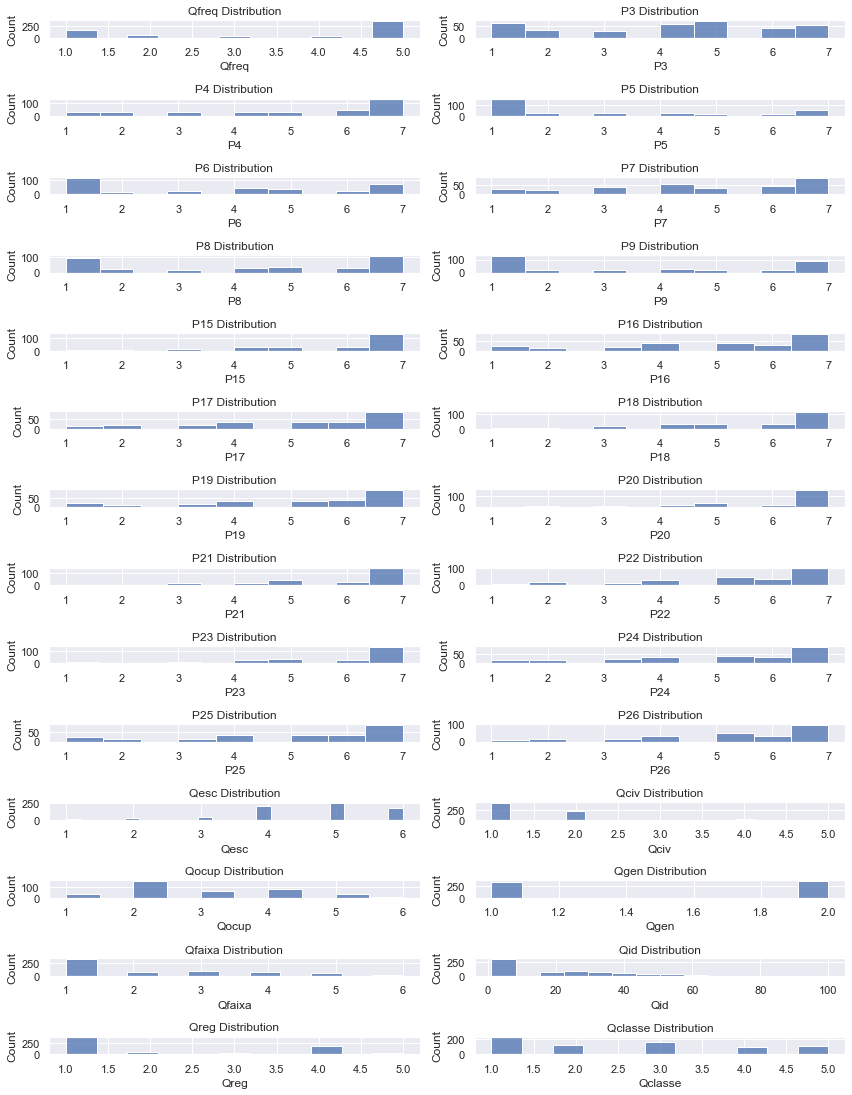

In [273]:
# Visualize the distribution of each variable.
plt.figure(figsize=(12,16))
for i, j in enumerate(df.describe().columns):
    plt.subplot(15,2, i+1)
    sns.histplot(x=df[j])
    plt.xlabel(j)
    plt.title('{} Distribution'.format(j))
    # plt.subplots_adjust(wspace=.2, hspace=.5)
    plt.tight_layout()
plt.show()

Para a nossa análise consideramos que o mercado que o cliente quer atingir com os seus produtos são as pessoas que consomem pelo menos algum tipo de suplementação, ou seja que já são usuários. 


Para isso, vamos dividir a base de dados fornecida em 2: uma composta por todas as pessoas que sinalizaram utilizar suplementos e outra com as pessoas que não consomem. (Insight baseado na questão Qfreq do questionário)

Não consumidores = pessoas que responderam (na pergunta Qfreq) que não costumam utilizar suplementos alimentares durante semana. 

In [274]:
consumidores = df['Qfreq'] != 5
indiferentes = df['Qfreq'] == 5
df_consumidores = pd.DataFrame(df[consumidores])
df_indiferente = pd.DataFrame(df[indiferentes])

df[indiferentes].reset_index(inplace=True)
df_consumidores.reset_index(inplace=True)
df_consumidores

,index,Qfreq,P2,P3,P4,P5,P6,P7,P8,P9,...,P25,P26,Qesc,Qciv,Qocup,Qgen,Qfaixa,Qid,Qreg,Qclasse
0,0,4,NaN,NaN,7.0,2.0,7.0,7.0,1.0,1.0,...,7.0,7.0,3,2,3.0,1,3,31,3,5
1,1,4,NaN,NaN,5.0,1.0,1.0,3.0,5.0,4.0,...,6.0,4.0,5,1,3.0,1,6,59,4,3
2,2,2,NaN,NaN,6.0,1.0,6.0,3.0,6.0,1.0,...,7.0,7.0,4,1,2.0,1,2,20,2,3
3,3,1,NaN,NaN,2.0,1.0,2.0,2.0,2.0,1.0,...,NaN,NaN,3,2,2.0,1,2,24,1,5
4,4,1,NaN,NaN,7.0,7.0,7.0,2.0,7.0,7.0,...,7.0,7.0,4,1,3.0,1,4,40,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,468,4,NaN,NaN,7.0,1.0,1.0,5.0,1.0,7.0,...,5.0,7.0,5,1,NaN,1,1,2,5,2
331,469,4,NaN,NaN,2.0,1.0,1.0,3.0,1.0,3.0,...,7.0,2.0,5,1,NaN,2,1,3,5,5
332,470,3,NaN,NaN,7.0,1.0,1.0,4.0,7.0,1.0,...,7.0,5.0,4,2,NaN,1,1,5,5,4
333,471,1,NaN,NaN,2.0,1.0,1.0,2.0,1.0,3.0,...,2.0,1.0,5,2,NaN,2,1,6,5,3


## SELECIONANDO AS PERGUNTAS RELEVANTES PARA A CLUSTERIZAÇÃO
Com base na pesquisa mercadológica feita pelo grupo, foi identificado que no mercado de suplementos são as características demográficas e geográficas que definem o tipo de consumo que um cliente terá dentro desse mercado. Localização, gênero, faixa etária e classe social (renda mensal) são fatores que afetam o tipo de consumo (quais produtos que eles utilizam) e a frequência. 

Logo selecionamos as perguntas de frequência de consumo de suplementos durante semana, faixa etária, gênero, região e classe de todos os consumidores de suplementos da nossa base para realizar a clusterização. 


In [275]:
# LIMPANDO A BASE - tirando todos os valores nulos das vars impos
df_clusterizacao = df_consumidores.loc[:, ['Qfreq', 'Qfaixa', 'Qgen', 'Qreg', "Qclasse"]]
df_clusterizacao
#df_clusterizacao = df_clusterizacao.fillna(df_clusterizacao.median())

,Qfreq,Qfaixa,Qgen,Qreg,Qclasse
0,4,3,1,3,5
1,4,6,1,4,3
2,2,2,1,2,3
3,1,2,1,1,5
4,1,4,1,4,5
...,...,...,...,...,...
330,4,1,1,5,2
331,4,1,2,5,5
332,3,1,1,5,4
333,1,1,2,5,3


In [276]:
# ANALISE EXPLORATORIA
# % de onde estao as pessoas que consomem em GERAL
df_clusterizacao.Qreg.value_counts(normalize=True)*100

1    52.835821
4    23.880597
2     8.955224
5     8.059701
3     6.268657
Name: Qreg, dtype: float64

## Aplicando o método OneHotEncoder
Aqui aplicamos o método de pré-processamento de dados, uma vez que todas as variáveis selecionadas como relevantes são categóricas (e o método de clusterização que será utilizado mais para frente recebe variáveis numéricas). 

Esse método transforma uma variável categórica em binária permitindo assim a sua análise numérica. 

In [277]:

categories = [('Qfreq', [1,2,3,4]), ('Qfaixa', [1,2,3,4,5,6]), ('Qgen', [1,2]), ('Qreg', [1,2,3,4,5]), ('Qclasse', [1,2,3,4,5])]

ohe_columns = [x[0] for x in categories]
ohe_categories = [x[1] for x in categories]
enc = OneHotEncoder(sparse=False, categories=ohe_categories)

transformer = make_column_transformer((enc, ohe_columns), remainder='passthrough')

# We convert the resulting arrays to DataFrames
transformed=transformer.fit_transform(df_clusterizacao)
df_classificado = pd.DataFrame(
    transformed, 
    columns=transformer.get_feature_names_out(),
    index=df_clusterizacao.index
)
df_classificado

,onehotencoder__Qfreq_1,onehotencoder__Qfreq_2,onehotencoder__Qfreq_3,onehotencoder__Qfreq_4,onehotencoder__Qfaixa_1,onehotencoder__Qfaixa_2,onehotencoder__Qfaixa_3,onehotencoder__Qfaixa_4,onehotencoder__Qfaixa_5,onehotencoder__Qfaixa_6,...,onehotencoder__Qreg_1,onehotencoder__Qreg_2,onehotencoder__Qreg_3,onehotencoder__Qreg_4,onehotencoder__Qreg_5,onehotencoder__Qclasse_1,onehotencoder__Qclasse_2,onehotencoder__Qclasse_3,onehotencoder__Qclasse_4,onehotencoder__Qclasse_5
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
331,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
332,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
333,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


## Normalização da Base de Dados
Normalizando todos os valores das colunas agora numérica para que o conjunto de dados tenha uma escala comum e não distoça as diferenças entre os intervalos na hora de agrupar as suas semelhanças, assim evitando de perder informações e relacionamentos importantes. 

In [278]:
# Normalizando a base
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df_classificado) # ou df_clusterizacao

## Aplicando o Método de Clusterização: KMEANS

In [279]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(segmentation_std)
    wcss.append(kmeans.inertia_)


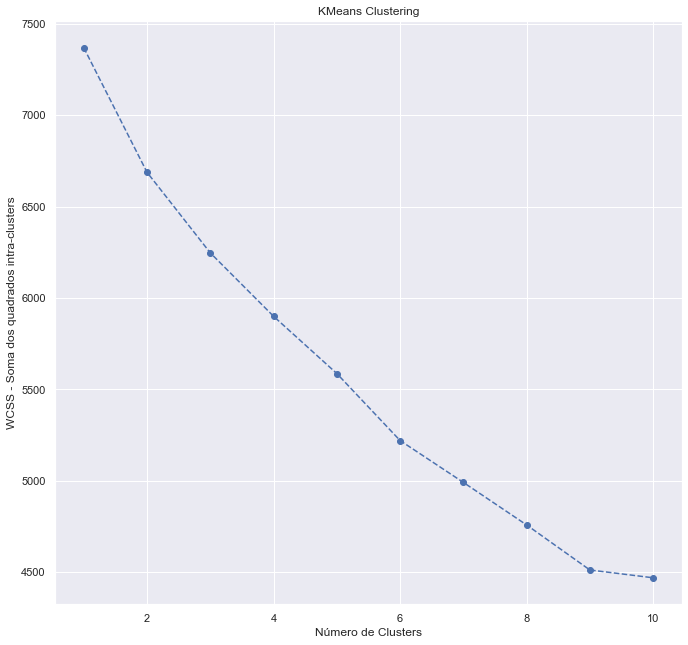

In [280]:
plt.figure(figsize=(10,10))
plt.plot(range(1,11), wcss, marker='o', linestyle='--')
plt.xlabel("Número de Clusters")
plt.ylabel('WCSS - Soma dos quadrados intra-clusters')
plt.title("KMeans Clustering")
plt.show()

## Escolha do Número de Clusters - Método do Cotovelo

In [281]:
kl = KneeLocator(
   range(1, 11), wcss, curve="convex", direction="decreasing"
)

n_cluster = kl.elbow
print(n_cluster)

6


## Analisando a Acurácia dessa Clusterização
A partir do número de clusters ideal da clusterização (obtido com o método do cotovelo), é realizado uma análise do coeficiente de silhueta dessa divisão de clusters afim de entender se ela pode ser considerada válida ou não. 

Este método mede a distância dos pontos de cada cluster e identifica se eles estão mais próximos deles mesmos e de seu centro (centroide da clusterização) ou se estão mais próximos de pontos de outros clusters. 

Essa escala vai de -1 a 1, sendo que quanto mais próximo de 1 mais agrupados os pontos estão e logo a clusterização possui mais acurácia. 



In [282]:
silhouette_coefficients = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k,  init='k-means++', random_state=42)
    kmeans.fit(segmentation_std)
    score = silhouette_score(segmentation_std, kmeans.labels_)
    silhouette_coefficients.append(score)

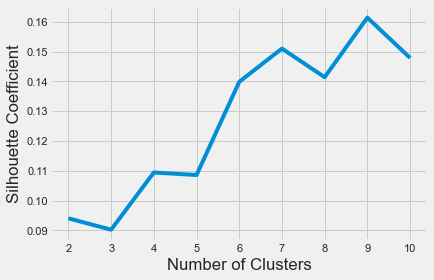

In [283]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

## VALIDANDO O NUMERO DE CLUSTERS
Apesar de o nosso número de clusters ter dado um coeficiente baixo (e não negativo), isso não invalida o nosso modelo uma vez que as perguntas não possuem tanta correlação entre as suas respotas e são referentes a diferentes características de uma pessoa (não apenas demográfico por exemplo). 

Isso faz com que mesmo parecidas entre sí as pessoas (pontos) não consigam ser agrupados tão proximamente e portanto gerando um coeficiente de silhueta mais baixo. 

In [284]:
# USANDO N = MELHOR MUMEROS DE CLUSTERS
kmeans = KMeans(n_clusters=n_cluster, init='k-means++', random_state=42)
kmeans.fit(segmentation_std)



KMeans(n_clusters=6, random_state=42)

## Analisando os Resultados da Clusterização

Aqui analisamos cada cluster mais especificamente afim de entender seus comportamentos e definir uma persona. 

In [285]:
# ANALISANDO OS RESULTADOS DA CLUSTERIZAÇÃO - 1a iteração
df_segm_kmeans = pd.concat([df_clusterizacao.reset_index(drop=True), pd.DataFrame(segmentation_std)], axis=1)
df_segm_kmeans.columns.values[-3: ] = ['Comp 1', 'Comp 2', 'Comp 3']
df_segm_kmeans['Cluster'] = kmeans.labels_

df_segm_kmeans.head()

,Qfreq,Qfaixa,Qgen,Qreg,Qclasse,0,1,2,3,4,...,13,14,15,16,17,18,Comp 1,Comp 2,Comp 3,Cluster
0,4,3,1,3,5,-0.979318,-0.541698,-0.403973,2.445233,-0.606092,...,-0.313625,3.866831,-0.560112,-0.296078,-0.383745,-0.403973,-0.647682,-0.532471,1.911224,2
1,4,6,1,4,3,-0.979318,-0.541698,-0.403973,2.445233,-0.606092,...,-0.313625,-0.258610,1.785357,-0.296078,-0.383745,-0.403973,1.543968,-0.532471,-0.523225,5
2,2,2,1,2,3,-0.979318,1.846048,-0.403973,-0.408959,-0.606092,...,3.188521,-0.258610,-0.560112,-0.296078,-0.383745,-0.403973,1.543968,-0.532471,-0.523225,0
3,1,2,1,1,5,1.021118,-0.541698,-0.403973,-0.408959,-0.606092,...,-0.313625,-0.258610,-0.560112,-0.296078,-0.383745,-0.403973,-0.647682,-0.532471,1.911224,2
4,1,4,1,4,5,1.021118,-0.541698,-0.403973,-0.408959,-0.606092,...,-0.313625,-0.258610,1.785357,-0.296078,-0.383745,-0.403973,-0.647682,-0.532471,1.911224,5


In [286]:
# AGRUPANDO A BASE DE DADOS POR CLUSTERS PARA ENTENDER O SEUS COMPORTAMENTOS 
grouped_by_clusters = df_segm_kmeans.groupby('Cluster')
grouped_by_clusters.describe()

Qfreq                                               Qfaixa            \
        count      mean       std  min  25%  50%   75%  max  count      mean   
Cluster                                                                        
0        30.0  1.733333  0.980265  1.0  1.0  1.0  2.00  4.0   30.0  3.600000   
1        41.0  2.170732  1.159794  1.0  1.0  2.0  3.00  4.0   41.0  1.317073   
2        76.0  2.105263  1.195312  1.0  1.0  2.0  3.00  4.0   76.0  3.131579   
3        84.0  1.916667  1.032115  1.0  1.0  2.0  2.25  4.0   84.0  3.166667   
4        27.0  1.851852  1.199478  1.0  1.0  1.0  2.50  4.0   27.0  2.592593   
5        77.0  1.779221  1.021137  1.0  1.0  1.0  2.00  4.0   77.0  2.974026   

         ...    Comp 2           Comp 3                                    \
         ...       75%       max  count      mean           std       min   
Cluster  ...                                                                
0        ...  1.275411  1.878038   30.0 -0.360928  6.176395e-01 -0.523225   
1        ... -0.532471 -0.532471   41.0 -0.523225  1.124015e-16 -0.523225   
2        ... -0.532471  1.878038   76.0 -0.074774  9.499989e-01 -0.523225   
3        ...  1.878038  1.878038   84.0  0.085387  1.060479e+00 -0.523225   
4        ... -0.532471  1.878038   27.0  0.198093  1.132802e+00 -0.523225   
5        ...  1.878038  1.878038   77.0  0.330413  1.169272e+00 -0.523225   

                                                 
              25%       50%       75%       max  
Cluster                                          
0       -0.523225 -0.523225 -0.523225  1.911224  
1       -0.523225 -0.523225 -0.523225 -0.523225  
2       -0.523225 -0.523225 -0.523225  1.911224  
3       -0.523225 -0.523225  0.085387  1.911224  
4       -0.523225 -0.523225  1.911224  1.911224  
5       -0.523225 -0.523225  1.911224  1.911224  

[6 rows x 216 columns]

In [287]:
# ANALISE DE CLUSTER X GASTOS COM SUPLEMENTOS
cluster_x_gastos = pd.crosstab(df_segm_kmeans['Cluster'], df_segm_kmeans['Qfreq'], normalize='index',margins=True).round(3)*100
cluster_x_gastos

Qfreq,1,2,3,4
Cluster,,,,
0,56.7,20.0,16.7,6.7
1,39.0,24.4,17.1,19.5
2,44.7,21.1,13.2,21.1
3,45.2,29.8,13.1,11.9
4,59.3,14.8,7.4,18.5
5,55.8,19.5,15.6,9.1
All,49.0,22.7,14.0,14.3


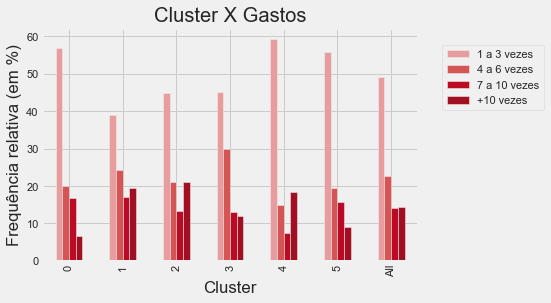

In [288]:
# GRÁFICO DE CLUSTER X GASTOS
cores = ['#E79D9D', '#D55555', '#BB0B24', '#A10F23', '#871223', '#6D1622', '#531921']

df_segm_kmeans.Qfreq = df_segm_kmeans.Qfreq.astype('category')
df_segm_kmeans.Qfreq.cat.categories = ['1 a 3 vezes', '4 a 6 vezes', '7 a 10 vezes', '+10 vezes']

cluster_x_classe = pd.crosstab(df_segm_kmeans['Cluster'], df_segm_kmeans['Qfreq'], normalize='index',margins=True).round(3)*100

cluster_x_classe.plot.bar(color=cores)
plt.title('Cluster X Gastos')
plt.ylabel('Frequência relativa (em %)')
plt.xlabel('Cluster')
plt.legend(['1 a 3 vzs', '4 a 6 vzs', '7 a 10 vzs', '+10 vzs'], loc='center')
plt.legend(bbox_to_anchor=(1.05, 0.95)); # Coloca legenda para fora da janela gráfica
plt.show()

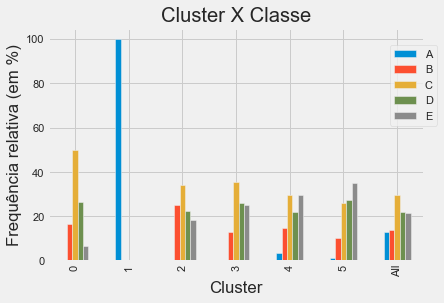

In [289]:
# GRÁFICO DE CLUSTER X CLASSE

df_segm_kmeans.Qclasse = df_segm_kmeans.Qclasse.astype('category')
df_segm_kmeans.Qclasse.cat.categories = ['A', 'B', 'C', 'D', 'E']

cluster_x_classe = pd.crosstab(df_segm_kmeans['Cluster'], df_segm_kmeans['Qclasse'], normalize='index',margins=True).round(3)*100

cluster_x_classe.plot.bar()
plt.title('Cluster X Classe')
plt.ylabel('Frequência relativa (em %)')
plt.xlabel('Cluster')
plt.legend(['A', 'B', 'C', 'D', 'E'], loc='center')
plt.legend(bbox_to_anchor=(1.05, 0.95)); # Coloca legenda para fora da janela gráfica
plt.show()

In [290]:
cluster_x_classe

Qclasse,A,B,C,D,E
Cluster,,,,,
0,0.0,16.7,50.0,26.7,6.7
1,100.0,0.0,0.0,0.0,0.0
2,0.0,25.0,34.2,22.4,18.4
3,0.0,13.1,35.7,26.2,25.0
4,3.7,14.8,29.6,22.2,29.6
5,1.3,10.4,26.0,27.3,35.1
All,12.8,14.0,29.6,22.1,21.5


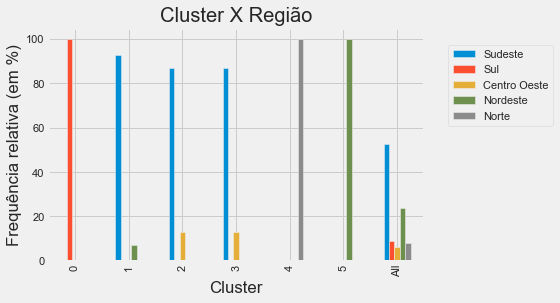

In [291]:
# GRÁFICO DE CLUSTER X REG

df_segm_kmeans.Qreg = df_segm_kmeans.Qreg.astype('category')
df_segm_kmeans.Qreg.cat.categories = ['Sudeste', 'Sul', 'Centro Oeste', 'Nordeste', 'Norte']

cluster_x_classe = pd.crosstab(df_segm_kmeans['Cluster'], df_segm_kmeans['Qreg'], normalize='index',margins=True).round(3)*100

cluster_x_classe.plot.bar()
plt.title('Cluster X Região')
plt.ylabel('Frequência relativa (em %)')
plt.xlabel('Cluster')
plt.legend(['A', 'B', 'C', 'D', 'E'], loc='center')
plt.legend(bbox_to_anchor=(1.05, 0.95)); # Coloca legenda para fora da janela gráfica
plt.show()

In [292]:
cluster_x_classe

Qreg,Sudeste,Sul,Centro Oeste,Nordeste,Norte
Cluster,,,,,
0,0.0,100.0,0.0,0.0,0.0
1,92.7,0.0,0.0,7.3,0.0
2,86.8,0.0,13.2,0.0,0.0
3,86.9,0.0,13.1,0.0,0.0
4,0.0,0.0,0.0,0.0,100.0
5,0.0,0.0,0.0,100.0,0.0
All,52.8,9.0,6.3,23.9,8.1


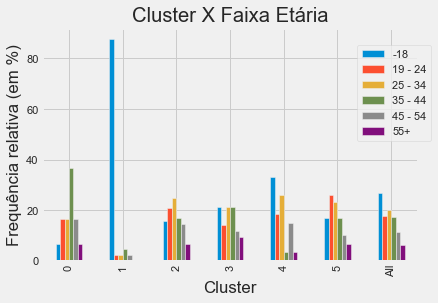

In [293]:
# GRÁFICO DE CLUSTER X FAIXA ETÁRIA

df_segm_kmeans.Qfaixa = df_segm_kmeans.Qfaixa.astype('category')
df_segm_kmeans.Qfaixa.cat.categories = ['-18', '19 - 24', '25 - 34', '35 - 44', '45 - 54', '55+']

cluster_x_classe = pd.crosstab(df_segm_kmeans['Cluster'], df_segm_kmeans['Qfaixa'], normalize='index',margins=True).round(3)*100

cluster_x_classe.plot.bar()
plt.title('Cluster X Faixa Etária')
plt.ylabel('Frequência relativa (em %)')
plt.xlabel('Cluster')
plt.legend(['-18', '19 - 24', '25 - 34', '35 - 44', '45 - 54', '55+'], loc='center')
plt.legend(bbox_to_anchor=(1.05, 0.95)); # Coloca legenda para fora da janela gráfica
plt.show()

In [294]:
cluster_x_classe

Qfaixa,-18,19 - 24,25 - 34,35 - 44,45 - 54,55+
Cluster,,,,,,
0,6.7,16.7,16.7,36.7,16.7,6.7
1,87.8,2.4,2.4,4.9,2.4,0.0
2,15.8,21.1,25.0,17.1,14.5,6.6
3,21.4,14.3,21.4,21.4,11.9,9.5
4,33.3,18.5,25.9,3.7,14.8,3.7
5,16.9,26.0,23.4,16.9,10.4,6.5
All,26.9,17.6,20.3,17.3,11.6,6.3


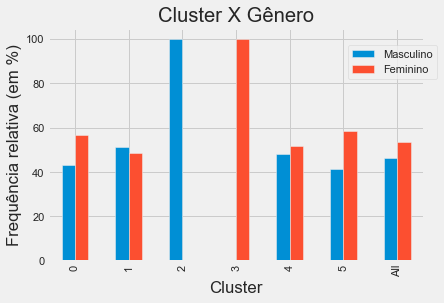

In [295]:
# GRÁFICO DE CLUSTER X GÊNERO

df_segm_kmeans.Qgen = df_segm_kmeans.Qgen.astype('category')
df_segm_kmeans.Qgen.cat.categories = ['Masculino','Feminino']

cluster_x_classe = pd.crosstab(df_segm_kmeans['Cluster'], df_segm_kmeans['Qgen'], normalize='index',margins=True).round(3)*100

cluster_x_classe.plot.bar()
plt.title('Cluster X Gênero')
plt.ylabel('Frequência relativa (em %)')
plt.xlabel('Cluster')
plt.legend(['Masculino','Feminino'], loc='center')
plt.legend(bbox_to_anchor=(1.05, 0.95)); # Coloca legenda para fora da janela gráfica
plt.show()

In [296]:
cluster_x_classe

Qgen,Masculino,Feminino
Cluster,,
0,43.3,56.7
1,51.2,48.8
2,100.0,0.0
3,0.0,100.0
4,48.1,51.9
5,41.6,58.4
All,46.3,53.7


## DEFININDO A NOSSA PERSONA
### Escolha de Cluster - Cluster 2  

Optamos por escolher como público alvo as pessoas presente no Grupo 2. 

Entendemos que as características de classe social elevada (maior poder aquisitivo, logo podem pagar o ticket médio mais elevado do nosso cliente), frequência de consumo alta (costumam comprar mais produtos) e de idade entre o range millenial (maiores consumidores do mercado de suplementos hoje), são o tipo de pessoa que podem e possuem maior probabilidade de comprar os produtos da +Sup e logo é onde devemos focar para  os produtos da marca conseguirem atingir ativamente. 

Assim, o cluster 2 foi o escolhido, uma vez que comparado a todos os outros é o que mais se encaixa no perfil de provável cliente para a + sup.  

In [297]:
df_consumidores['Cluster'] = df_segm_kmeans.loc[:,'Cluster']
df_consumidores

,index,Qfreq,P2,P3,P4,P5,P6,P7,P8,P9,...,P26,Qesc,Qciv,Qocup,Qgen,Qfaixa,Qid,Qreg,Qclasse,Cluster
0,0,4,NaN,NaN,7.0,2.0,7.0,7.0,1.0,1.0,...,7.0,3,2,3.0,1,3,31,3,5,2
1,1,4,NaN,NaN,5.0,1.0,1.0,3.0,5.0,4.0,...,4.0,5,1,3.0,1,6,59,4,3,5
2,2,2,NaN,NaN,6.0,1.0,6.0,3.0,6.0,1.0,...,7.0,4,1,2.0,1,2,20,2,3,0
3,3,1,NaN,NaN,2.0,1.0,2.0,2.0,2.0,1.0,...,NaN,3,2,2.0,1,2,24,1,5,2
4,4,1,NaN,NaN,7.0,7.0,7.0,2.0,7.0,7.0,...,7.0,4,1,3.0,1,4,40,4,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,468,4,NaN,NaN,7.0,1.0,1.0,5.0,1.0,7.0,...,7.0,5,1,NaN,1,1,2,5,2,4
331,469,4,NaN,NaN,2.0,1.0,1.0,3.0,1.0,3.0,...,2.0,5,1,NaN,2,1,3,5,5,4
332,470,3,NaN,NaN,7.0,1.0,1.0,4.0,7.0,1.0,...,5.0,4,2,NaN,1,1,5,5,4,4
333,471,1,NaN,NaN,2.0,1.0,1.0,2.0,1.0,3.0,...,1.0,5,2,NaN,2,1,6,5,3,4


In [298]:
persona =df_consumidores[df_consumidores.Cluster == 2]




## ESCOLHA DE CLUSTER 
Cluster N° 2 (de 0 a 5)

### PUBLICO ALVO
- Key Questions da clusterização (Insights gerados a partir dos gráficos de cada questão e seus clusters)
    - Classe: +50% B e C
    - Faixa Etária: majoritariamente entre 18 e 34 anos (Millenials)
    - Gênero: Masculino 
    - Consumo: + 50% consumindo pelo menos 4 vezes ou mais na 
    - Região: Sudeste e Centroeste

### PERFIL DA PERSONA
- Key Questions da clusterização - Caracteristicas GERAIS
    - Classe: B
    - Faixa: 29 anos
    - Gênero: Masculino
    - Consumo: 4 a 6 vezes na semana (quase 1 vez por semana)
    - Região: Sudeste

A partir dessas características traçadas, conseguimos analisar mais detalhadamente o perfil do nosso público alvo e gerar uma persona mais assertiva para o PEM (Plano Estratégico de Marketing) solicitado pelo cliente (+Sup).


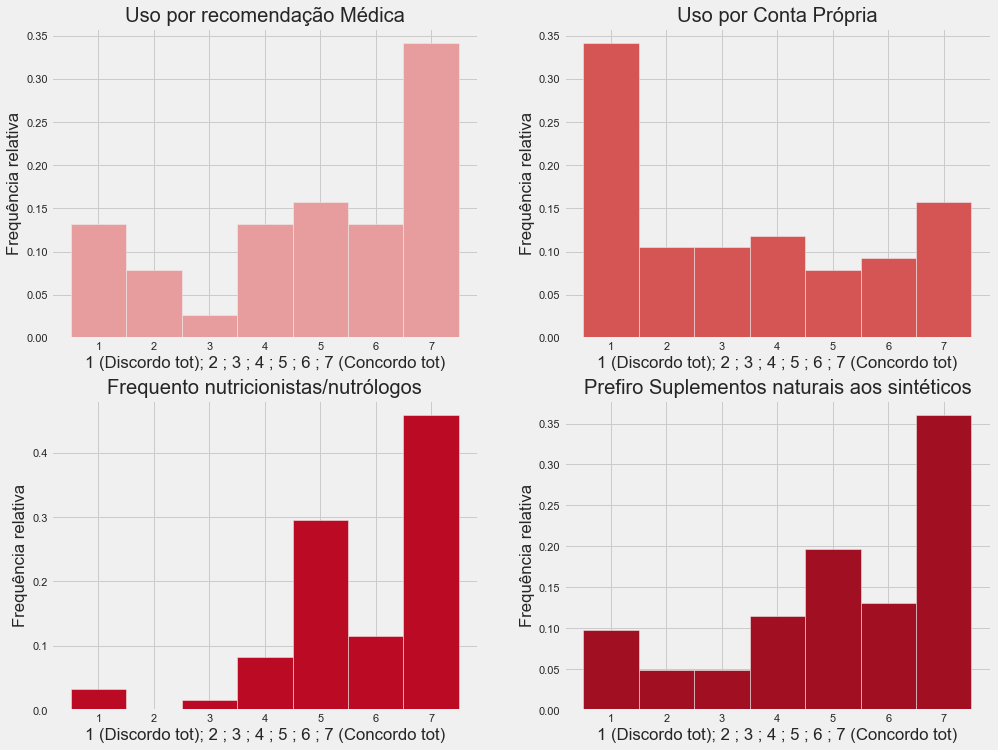

In [299]:
# ANALISANDO O PQ DO CONSUMO DA NOSSA PERSONA
cores = ['#E79D9D', '#D55555', '#BB0B24', '#A10F23', '#871223', '#6D1622', '#531921']
 
plt.figure(figsize=(15,50))

plt.subplot(8,2,1)
faixa1 = arange(1,9,1)
faixa2= arange(1,8,1)
faixa1
plt.hist(persona['P8'], bins=faixa1, density=True, align='left', color=cores[0])
plt.title('Uso por recomendação Médica')
plt.ylabel('Frequência relativa')
plt.xlabel('1 (Discordo tot); 2 ; 3 ; 4 ; 5 ; 6 ; 7 (Concordo tot)')



plt.subplot(8,2,2)
plt.hist(persona['P9'], bins=faixa1, density=True, align='left', color=cores[1])
plt.title('Uso por Conta Própria')
plt.ylabel('Frequência relativa')
plt.xlabel('1 (Discordo tot); 2 ; 3 ; 4 ; 5 ; 6 ; 7 (Concordo tot)')

plt.subplot(8,2,3)
plt.hist(persona['P21'], bins=faixa1, density=True, align='left', color=cores[2])
plt.title('Frequento nutricionistas/nutrólogos')
plt.ylabel('Frequência relativa')
plt.xlabel('1 (Discordo tot); 2 ; 3 ; 4 ; 5 ; 6 ; 7 (Concordo tot)')

plt.subplot(8,2,4)
plt.hist(persona['P25'], bins=faixa1, density=True, align='left', color=cores[3])
plt.title('Prefiro Suplementos naturais aos sintéticos')
plt.ylabel('Frequência relativa')
plt.xlabel('1 (Discordo tot); 2 ; 3 ; 4 ; 5 ; 6 ; 7 (Concordo tot)')

plt.show()




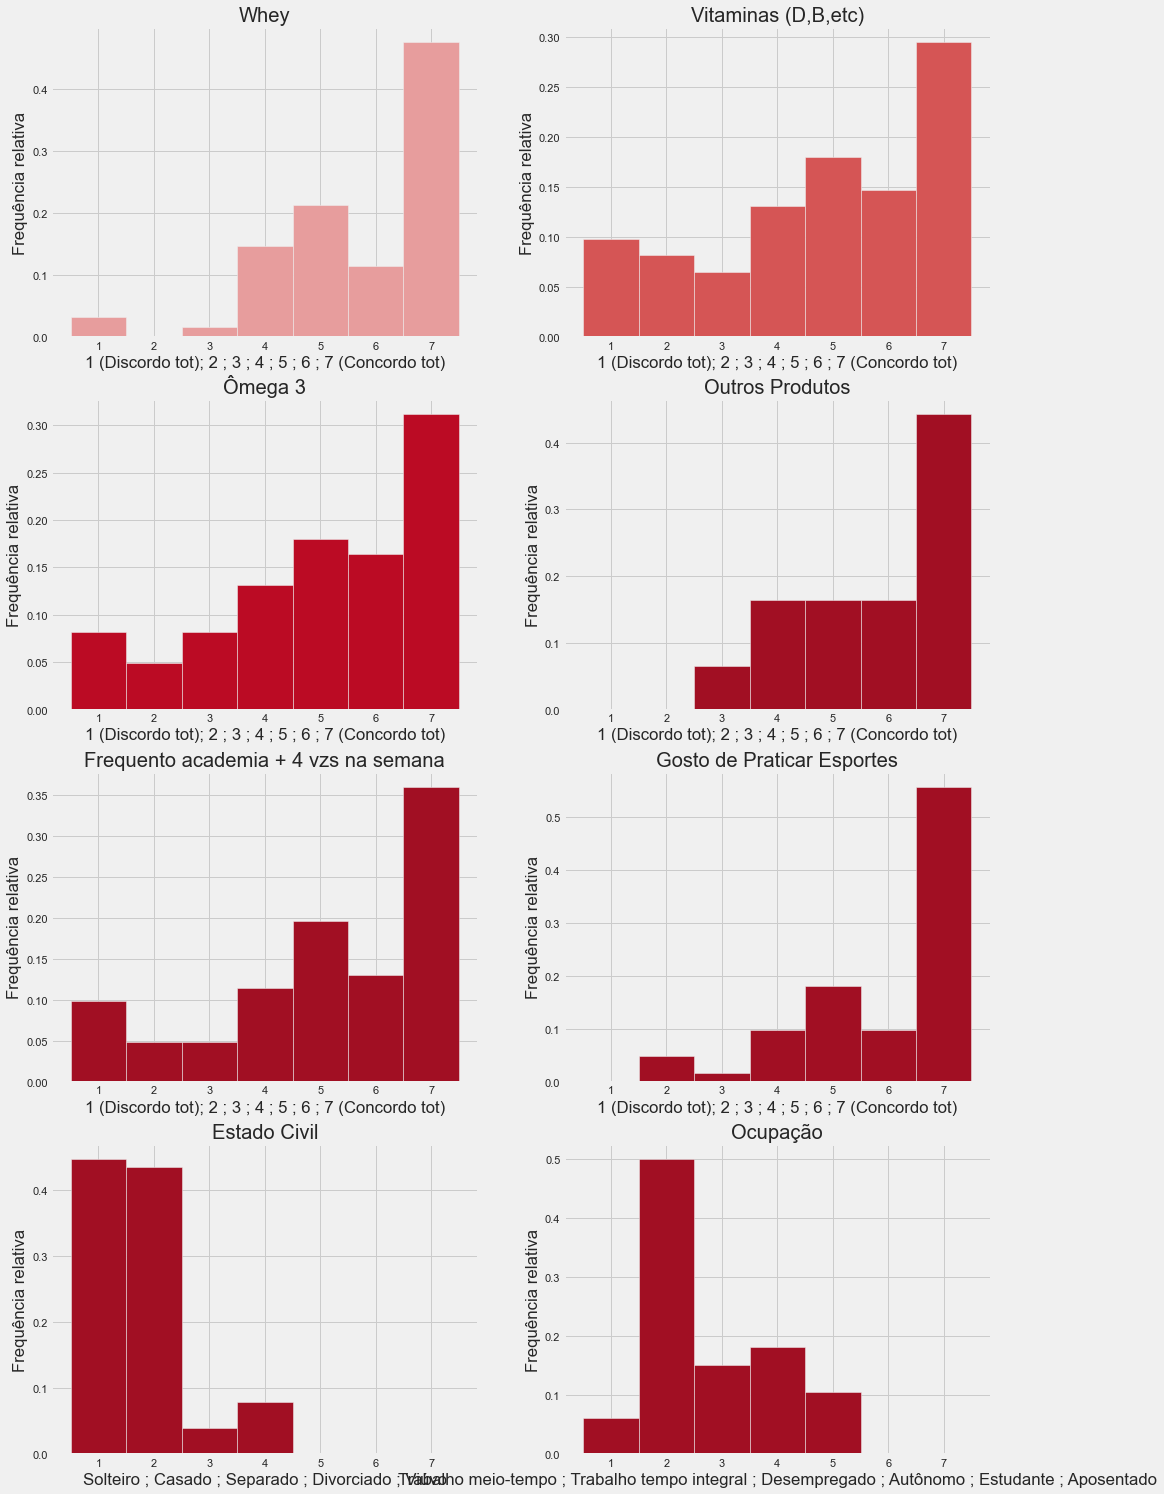

In [311]:
# ANALISANDO O CONSUMO DA PERSONA - PREFERENCIAS DE PRODUTOS
plt.figure(figsize=(15,50))
#cores = 

plt.subplot(8,2,1)
faixa1 = arange(1,9,1)
faixa2= arange(1,8,1)
faixa1
plt.hist(persona['P15'], bins=faixa1, density=True, align='left', color=cores[0])
plt.title('Whey')
plt.ylabel('Frequência relativa')
plt.xlabel('1 (Discordo tot); 2 ; 3 ; 4 ; 5 ; 6 ; 7 (Concordo tot)')



plt.subplot(8,2,2)
plt.hist(persona['P16'], bins=faixa1, density=True, align='left', color=cores[1])
plt.title('Vitaminas (D,B,etc)')
plt.ylabel('Frequência relativa')
plt.xlabel('1 (Discordo tot); 2 ; 3 ; 4 ; 5 ; 6 ; 7 (Concordo tot)')

plt.subplot(823)
plt.hist(persona['P17'], bins=faixa1, density=True, align='left', color=cores[2])
plt.title('Ômega 3')
plt.ylabel('Frequência relativa')
plt.xlabel('1 (Discordo tot); 2 ; 3 ; 4 ; 5 ; 6 ; 7 (Concordo tot)')


plt.subplot(824)
plt.hist(persona['P18'], bins=faixa1, density=True, align='left', color=cores[3])
plt.title('Outros Produtos')
plt.ylabel('Frequência relativa')
plt.xlabel('1 (Discordo tot); 2 ; 3 ; 4 ; 5 ; 6 ; 7 (Concordo tot)')

plt.subplot(825)
plt.hist(persona['P19'], bins=faixa1, density=True, align='left', color=cores[3])
plt.title('Frequento academia + 4 vzs na semana')
plt.ylabel('Frequência relativa')
plt.xlabel('1 (Discordo tot); 2 ; 3 ; 4 ; 5 ; 6 ; 7 (Concordo tot)')

plt.subplot(826)
plt.hist(persona['P20'], bins=faixa1, density=True, align='left', color=cores[3])
plt.title('Gosto de Praticar Esportes')
plt.ylabel('Frequência relativa')
plt.xlabel('1 (Discordo tot); 2 ; 3 ; 4 ; 5 ; 6 ; 7 (Concordo tot)')

plt.subplot(827)
plt.hist(persona['Qciv'], bins=faixa1, density=True, align='left', color=cores[3])
plt.title('Estado Civil')
plt.ylabel('Frequência relativa')
plt.xlabel('Solteiro ; Casado ; Separado ; Divorciado ; Viúvo')

plt.subplot(828)
plt.hist(persona['Qocup'], bins=faixa1, density=True, align='left', color=cores[3])
plt.title('Ocupação')
plt.ylabel('Frequência relativa')
plt.xlabel('Trabalho meio-tempo ; Trabalho tempo integral ; Desempregado ; Autônomo ; Estudante ; Aposentado')


plt.show()

 Quantidade total de pessoas que NÃO CONSOMEM: 359


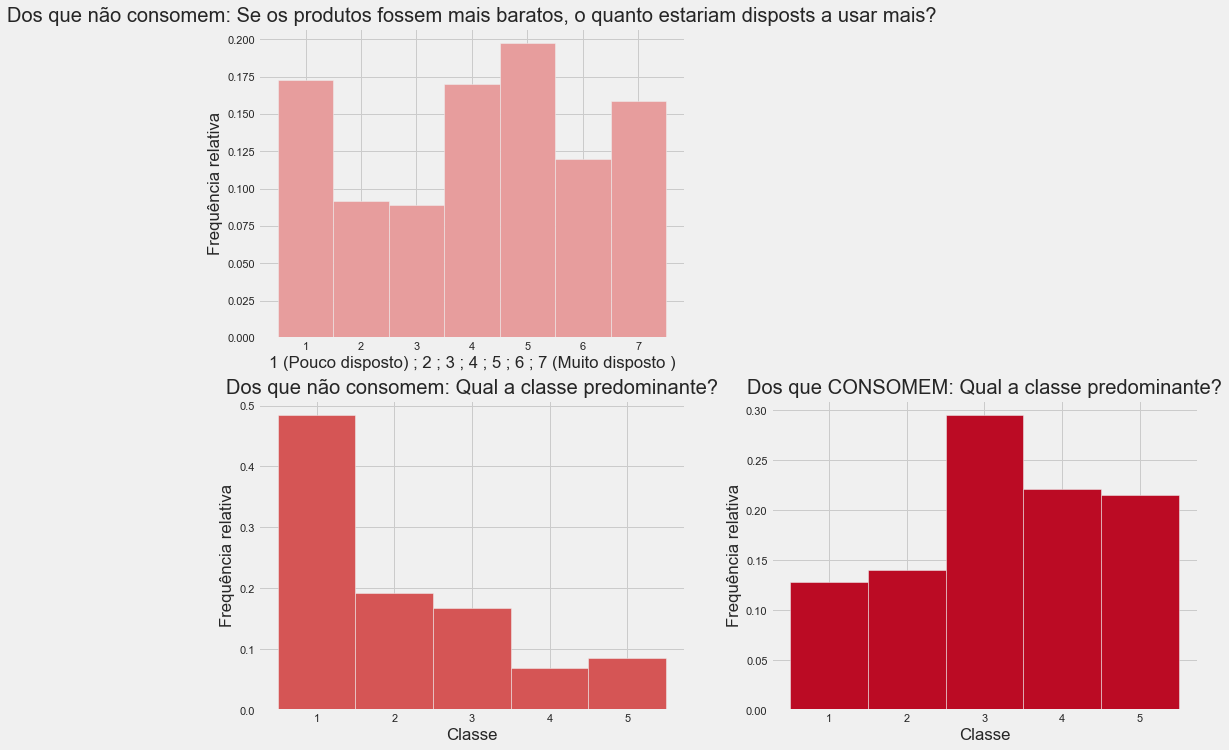

In [301]:
# GRÁFICOS E ANALISE DE COMPORTAMENTO DO PÚBLICO QUE NÃO COSTUMA CONSUMIR SUPLEMENTOS
plt.figure(figsize=(15,50))
faixa2= arange(1,7,1)

plt.subplot(8,2,1)

print(f' Quantidade total de pessoas que NÃO CONSOMEM: {len(df_indiferente)}')
plt.hist(df_indiferente['P3'], bins=faixa1, density=True, align='left', color=cores[0])
plt.title('Dos que não consomem: Se os produtos fossem mais baratos, o quanto estariam disposts a usar mais?')
plt.ylabel('Frequência relativa')
plt.xlabel('1 (Pouco disposto) ; 2 ; 3 ; 4 ; 5 ; 6 ; 7 (Muito disposto )')

plt.subplot(8,2,3)
plt.hist(df_indiferente['Qclasse'], bins=faixa2, density=True, align='left', color=cores[1])
plt.title('Dos que não consomem: Qual a classe predominante?')
plt.ylabel('Frequência relativa')
plt.xlabel('Classe')

plt.subplot(8,2,4)
plt.hist(df_consumidores['Qclasse'], bins=faixa2, density=True, align='left', color=cores[2])
plt.title('Dos que CONSOMEM: Qual a classe predominante?')
plt.ylabel('Frequência relativa')
plt.xlabel('Classe')

plt.show()


In [302]:
# COMO O PÚBLICO ALVO FICA SABENDO DAS MARCAS DE SUPLEMENTOS - onde estão? 
persona.reset_index(inplace=True)
persona

cores = ['#E79D9D', '#D55555', '#BB0B24', '#A10F23', '#871223', '#6D1622', '#531921']

#persona.P14.cat.categories = ['Não faço questão de produtos fitness', 'Não consumo produtos artificiais', 'Não confio nas propagandas feitas pelas marcas','Não acredito que esses produtos conseguem cumprir com sua proposta', 'Meu médico me recomendou não utilizar esses produtos', 'Não gosto do sabor desses produtos' , 'Acho esses produtos excessivamente caros' ]

Analisando - Quem NÃO consome suplementos

In [303]:
size = len(persona)
s1 = []
s2 = []
s3 = []
s4 = []
s5 = []
s6 = []
s7 = []



for i in range(size):
    resposta = persona.loc[i,'P14']

    if type(resposta) != str:
        resposta = str(resposta)

    if '1' in resposta:
        s1.append(1)
    else: 
        s1.append(0)

    if '2' in resposta:
        s2.append(1)
    else: 
        s2.append(0)

    if '3' in resposta:
        s3.append(1)
    else: 
        s3.append(0)

    if '4' in resposta:
        s4.append(1)
    else: 
        s4.append(0)

    if '5' in resposta:
        s5.append(1)
    else: 
        s5.append(0)

    if '6' in resposta:
        s6.append(1)
    else: 
        s6.append(0)

    if '7' in resposta:
        s7.append(1)
    else: 
        s7.append(0)


In [304]:
labels = ['1 - Propaganda em Redes Sociais', 
          '2 - Indicação de Amigos e Familiares', 
          '3 - Procurando sozinho(a) na internet', 
          '4 - Pontos de Divulgação Física', 
          '5 - Propagandas Dentros dos Próprios Mercados', 
          '6 - Outdoors', 
          '7 - Anuncios Virtuais em Sites na Internet']
values = [int(pd.Series(s1).value_counts()[1]),
          int(pd.Series(s2).value_counts()[1]), 
          int(pd.Series(s3).value_counts()[1]),
          int(pd.Series(s4).value_counts()[1]),
          int(pd.Series(s5).value_counts()[1]),
          int(pd.Series(s6).value_counts()[1]),
          int(pd.Series(s7).value_counts()[1])]



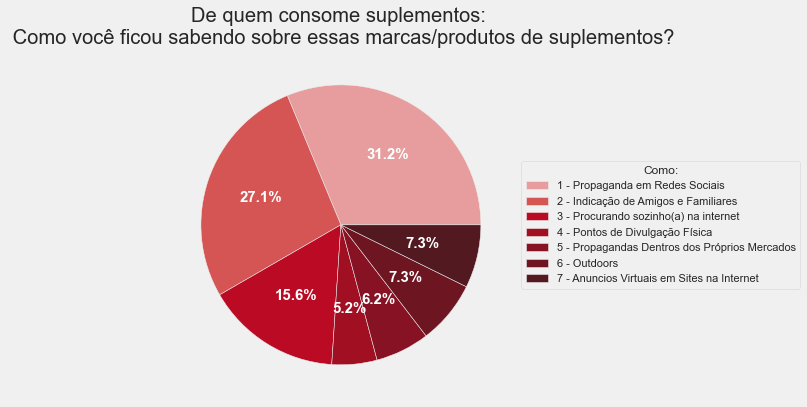

In [305]:
# PLOTANDO O PIE CHART
fig,ax = plt.subplots(figsize=(6,6), subplot_kw=dict(aspect='equal'))

def func(pct, allvals): 
    absolute = int(pct/100*np.sum(allvals))
    return "{:.1f}%".format(pct)

wedges, texts, autotexts = ax.pie(values, autopct=lambda pct: func(pct, values), textprops=dict(color='w'), colors=cores)

ax.legend(wedges, labels,
            title="Como:",
            loc="center left", 
            bbox_to_anchor = (1, 0, 0.5, 1))

plt.setp(autotexts, size=15, weight='bold')

ax.set_title("De quem consome suplementos: \n Como você ficou sabendo sobre essas marcas/produtos de suplementos?")

plt.show()



Analisando os que CONSOMEM  - Onde encontram os produtos

In [306]:


df_indiferente.reset_index(inplace=True)
size = len(df_indiferente)
print(size)
s1 = []
s2 = []
s3 = []
s4 = []
s5 = []
s6 = []
s7 = []



for i in range(size):
    resposta = df_indiferente.loc[i,'P2']

    if type(resposta) != str:
        resposta = str(resposta)

    if '1' in resposta:
        s1.append(1)
    else: 
        s1.append(0)

    if '2' in resposta:
        s2.append(1)
    else: 
        s2.append(0)

    if '3' in resposta:
        s3.append(1)
    else: 
        s3.append(0)

    if '4' in resposta:
        s4.append(1)
    else: 
        s4.append(0)

    if '5' in resposta:
        s5.append(1)
    else: 
        s5.append(0)

    if '6' in resposta:
        s6.append(1)
    else: 
        s6.append(0)

    if '7' in resposta:
        s7.append(1)
    else: 
        s7.append(0)




359


In [307]:
labels = ['1 - Não Faço Questão de Produtos Fitness', 
          '2 - Não Consumo Produtos Artificiais', 
          '3 - Não Confio nas Propagandas Feitas Pelas Marcas', 
          '4 - Não Acrecito que Esses Produtos Conseguem Cumprir com sua Proposta', 
          '5 - Meu Médico me recomendou não consumir esses produtos', 
          '6 - Não gosto do sabor desses produtos', 
          '7 - Acho esses produtos excessivamente caros']
values = [int(pd.Series(s1).value_counts()[1]),
          int(pd.Series(s2).value_counts()[1]), 
          int(pd.Series(s3).value_counts()[1]),
          int(pd.Series(s4).value_counts()[1]),
          int(pd.Series(s5).value_counts()[1]),
          int(pd.Series(s6).value_counts()[1]),
          int(pd.Series(s7).value_counts()[1])]



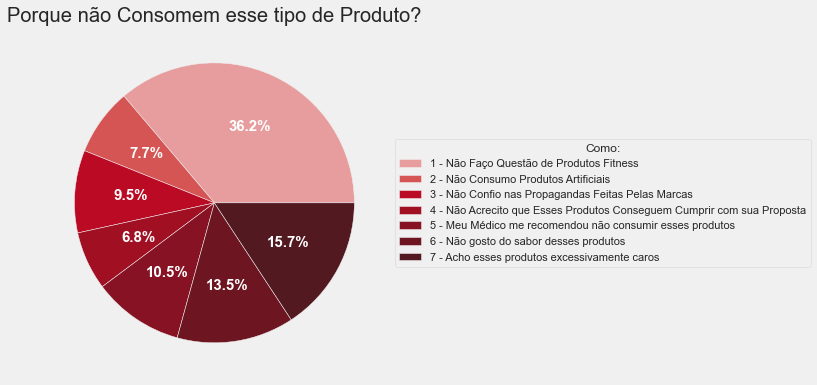

In [308]:
# PLOTANDO O PIE CHART
fig,ax = plt.subplots(figsize=(6,6), subplot_kw=dict(aspect='equal'))

def func(pct, allvals): 
    absolute = int(pct/100*np.sum(allvals))
    return "{:.1f}%".format(pct)

wedges, texts, autotexts = ax.pie(values, autopct=lambda pct: func(pct, values), textprops=dict(color='w', size = 15), colors=cores)

ax.legend(wedges, labels,
            title="Como:",
            loc="center left", 
            bbox_to_anchor = (1, 0, 0.5, 1))

plt.setp(autotexts, size=15, weight='bold')

ax.set_title("Porque não Consomem esse tipo de Produto?")

plt.show()

